In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_datacleaned.csv')

In [3]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,company_text,num_elements,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,Healthfirst,2,NY,1,31,0,0,0,1,0
1,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,INFICON,2,MA,0,24,1,0,0,1,1
2,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Affinity Solutions,2,NY,1,26,1,0,0,0,1
3,8,Staff Data Scientist - Analytics,$137K-$171K (Glassdoor est.),Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,...,Intuit - Data,2,CA,0,41,0,0,0,0,0
4,10,Data Scientist,$137K-$171K (Glassdoor est.),Join our team dedicated to developing and exec...,4.5,Novetta\n4.5,"Herndon, VA","Mc Lean, VA",501 to 1000 employees,2012,...,Novetta,2,VA,0,12,1,0,0,1,1


In [4]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text',
       'num_elements', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simp.value_counts()

data scientist    109
na                 22
analyst            17
data engineer      12
mle                 7
manager             2
Name: job_simp, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        146
senior     23
Name: seniority, dtype: int64

In [8]:
df.job_state.value_counts()

CA    37
VA    25
MD    14
MA    14
NY    12
TX     6
DC     6
IL     5
OH     5
IN     4
FL     4
WA     4
MO     4
OK     4
CO     3
GA     3
WI     2
MI     2
NH     2
PA     2
OR     1
DE     1
NJ     1
AL     1
MS     1
KS     1
WV     1
Name: job_state, dtype: int64

In [9]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3389
1      3349
2      2728
3       456
4      3607
       ... 
164    1836
165    2587
166    5274
167    3310
168    4301
Name: desc_len, Length: 169, dtype: int64

In [10]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df.company_text

0                       Healthfirst
1                           INFICON
2                Affinity Solutions
3                     Intuit - Data
4                           Novetta
                   ...             
164                           Apple
165    Southwest Research Institute
166                     AstraZeneca
167                        GutCheck
168             Foundation Medicine
Name: company_text, Length: 169, dtype: object

In [11]:
df.describe()

,index,Rating,Founded,min_salary,max_salary,avg_salary,num_elements,same_state,age,python_yn,r_yn,spark,aws,excel,desc_len,num_comp
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0,169.000000,169.000000,169.000000,169.000000,169.000000
mean,301.088757,3.846746,1968.863905,98.857988,147.668639,123.263314,1.976331,0.402367,55.136095,0.745562,0.0,0.289941,0.260355,0.485207,4037.426036,2.763314
std,195.840613,0.482310,46.227689,33.692640,48.520089,40.166916,0.152466,0.491832,46.227689,0.436839,0.0,0.455083,0.440132,0.501266,1726.641316,0.491187
min,0.000000,2.300000,1781.000000,31.000000,56.000000,43.500000,1.000000,0.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,178.000000,1.000000
25%,126.000000,3.500000,1947.000000,79.000000,123.000000,103.000000,2.000000,0.000000,18.000000,0.000000,0.0,0.000000,0.000000,0.000000,3018.000000,3.000000
50%,272.000000,3.800000,1983.000000,91.000000,132.000000,114.000000,2.000000,0.000000,41.000000,1.000000,0.0,0.000000,0.000000,0.000000,3915.000000,3.000000
75%,472.000000,4.200000,2006.000000,112.000000,165.000000,136.500000,2.000000,1.000000,77.000000,1.000000,0.0,1.000000,1.000000,1.000000,5020.000000,3.000000
max,666.000000,4.900000,2019.000000,212.000000,331.000000,271.500000,2.000000,1.000000,243.000000,1.000000,0.0,1.000000,1.000000,1.000000,10524.000000,3.000000


In [12]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text',
       'num_elements', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<Axes: >

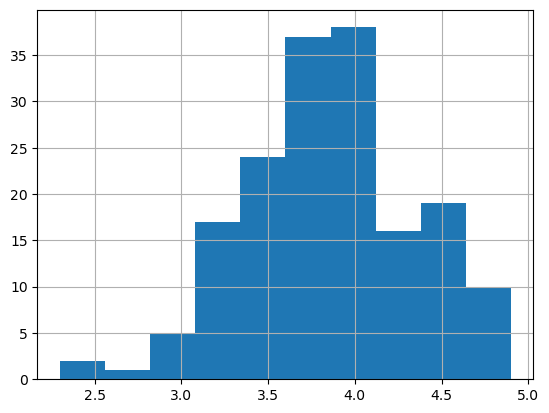

In [13]:
df.Rating.hist()

<Axes: >

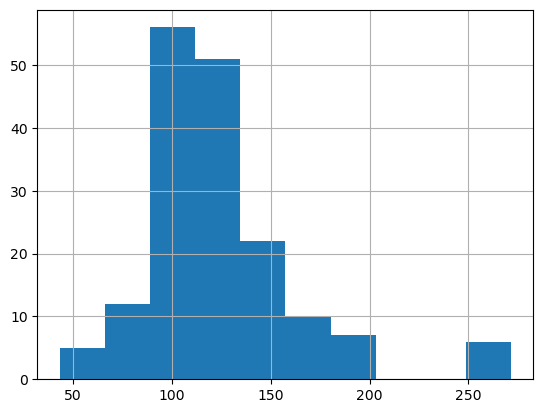

In [14]:
df.avg_salary.hist()

<Axes: >

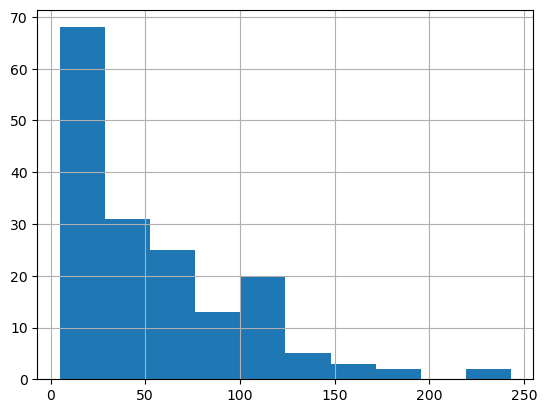

In [15]:
df.age.hist()

<Axes: >

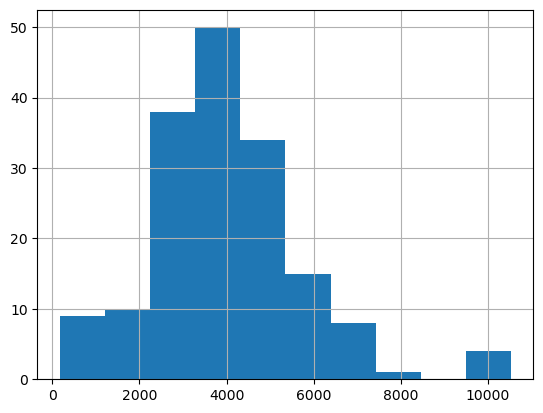

In [16]:
 df.desc_len.hist()

<Axes: >

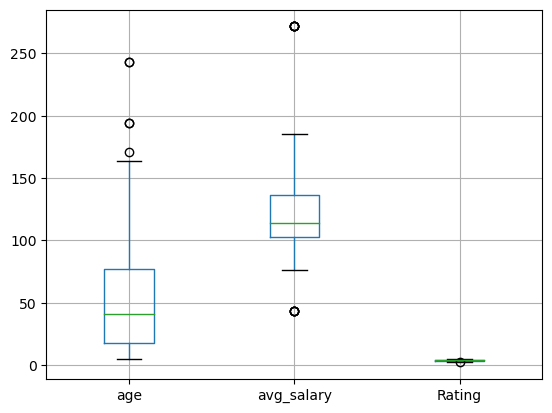

In [17]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

<Axes: >

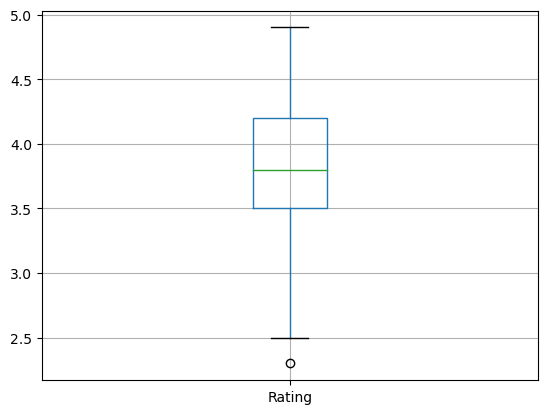

In [18]:
df.boxplot(column ='Rating')


In [19]:
df[ ['age', 'avg_salary', 'desc_len', 'Rating', 'num_comp']].corr()

,age,avg_salary,desc_len,Rating,num_comp
age,1.000000,0.086290,0.096085,-0.181079,-0.020069
avg_salary,0.086290,1.000000,-0.080805,-0.003573,0.045416
desc_len,0.096085,-0.080805,1.000000,0.069033,-0.140993
Rating,-0.181079,-0.003573,0.069033,1.000000,0.157533
num_comp,-0.020069,0.045416,-0.140993,0.157533,1.000000


<Axes: >

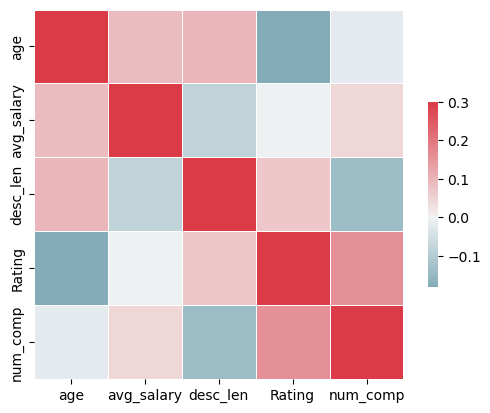

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'desc_len', 'Rating', 'num_comp']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidth=.5, cbar_kws={'shrink': .5})

In [21]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text',
       'num_elements', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [22]:
#taking all of the categorical data 
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'same_state', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'seniority']]
df_cat['Type of ownership'] = df_cat['Type of ownership'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_10720\4058331805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Type of ownership'] = df_cat['Type of ownership'].astype(str)


graph for Location: total = 74


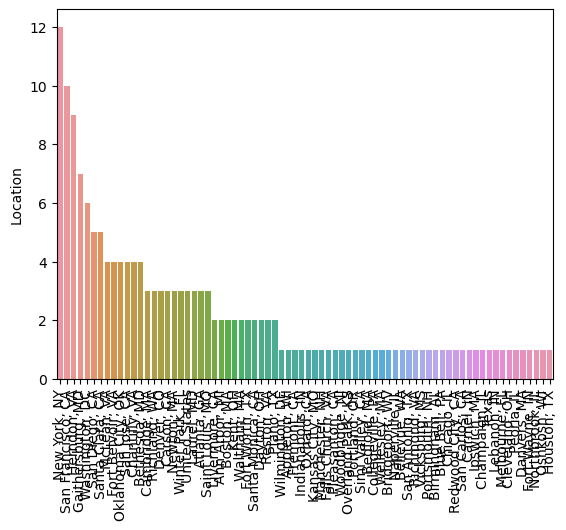

graph for Headquarters: total = 80


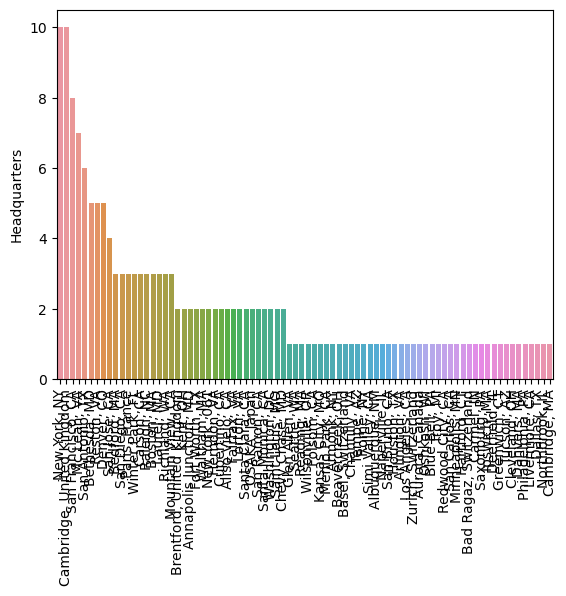

graph for Size: total = 8


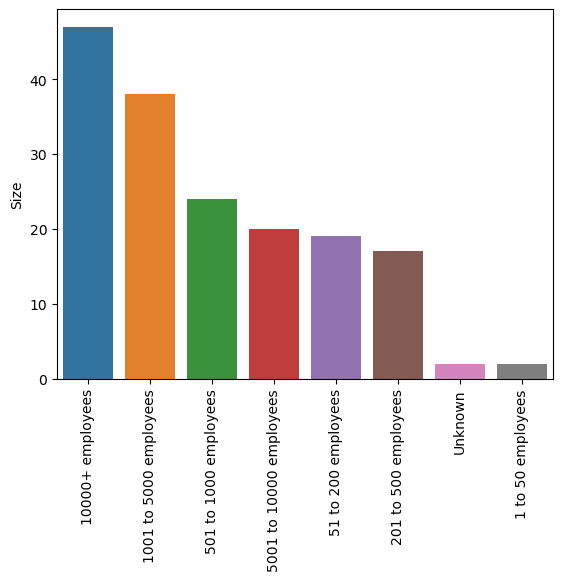

graph for Type of ownership: total = 7


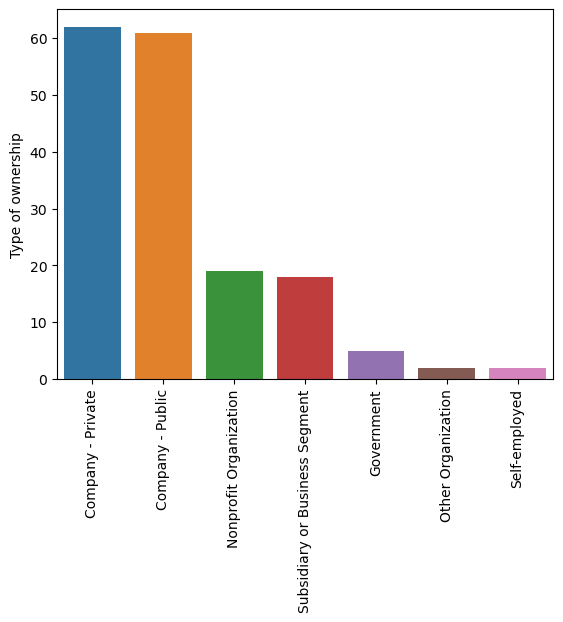

graph for Industry: total = 29


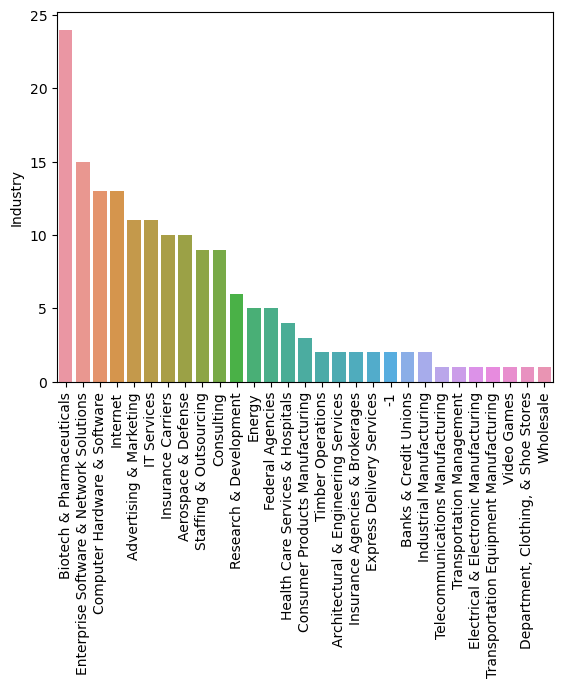

graph for Sector: total = 16


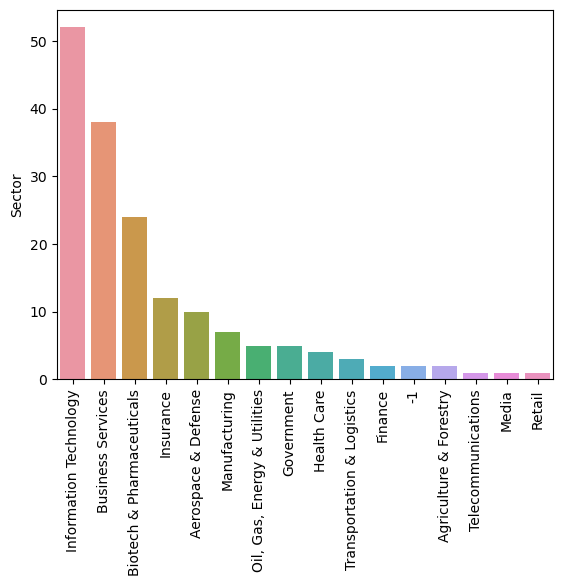

graph for Revenue: total = 11


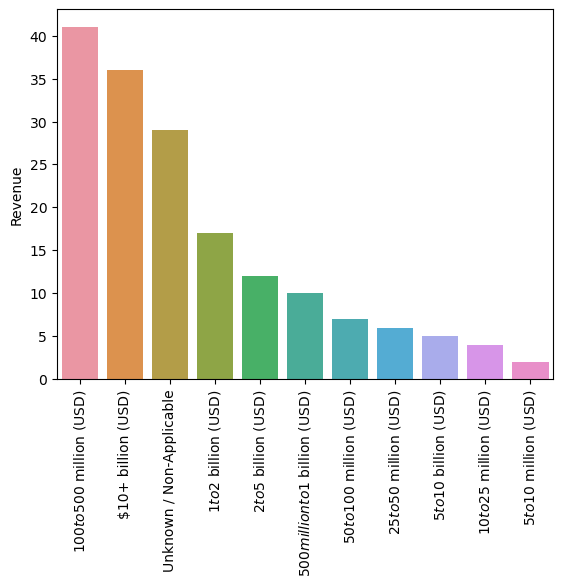

graph for company_text: total = 106


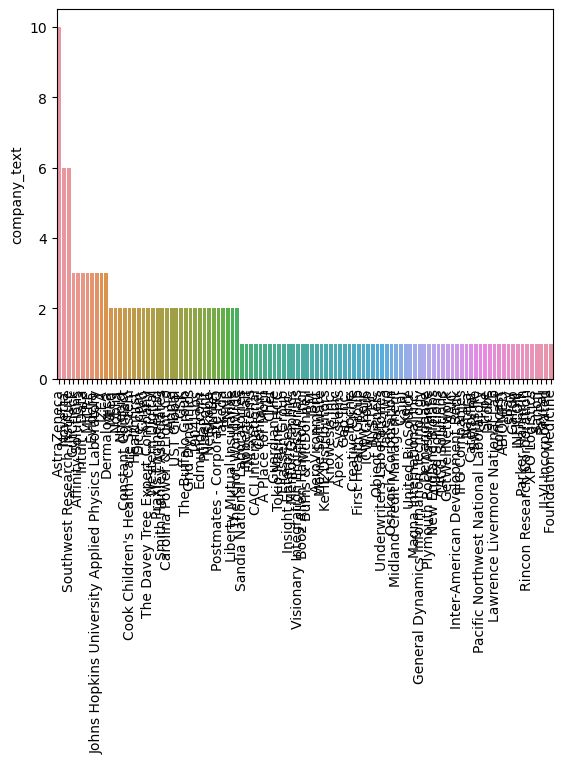

graph for job_state: total = 27


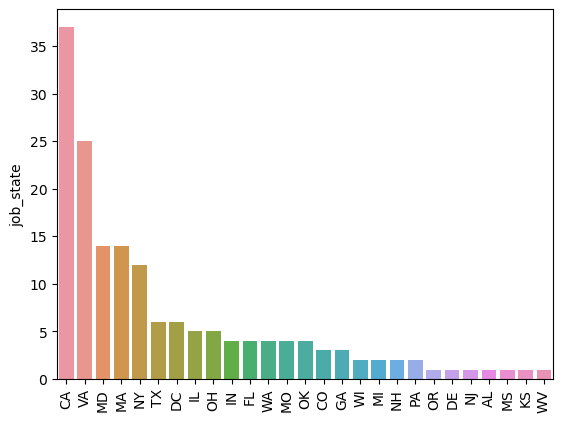

graph for same_state: total = 2


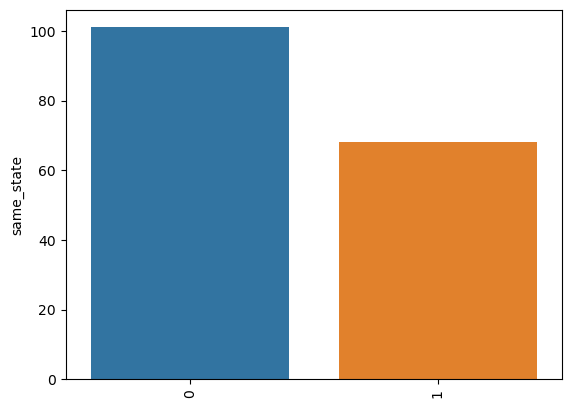

graph for python_yn: total = 2


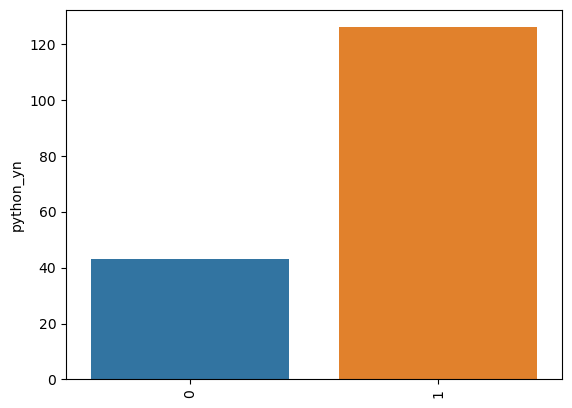

graph for r_yn: total = 1


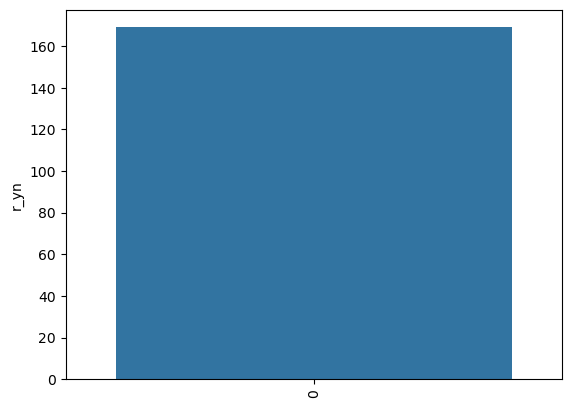

graph for spark: total = 2


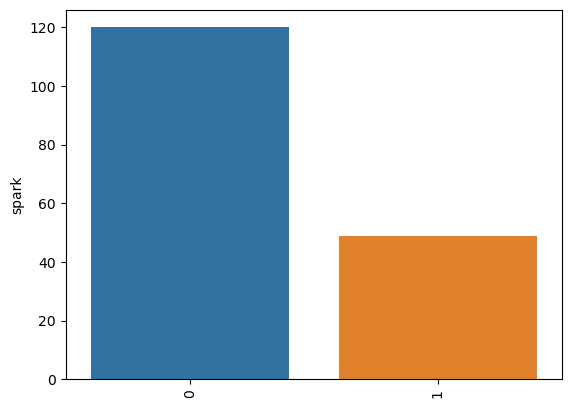

graph for aws: total = 2


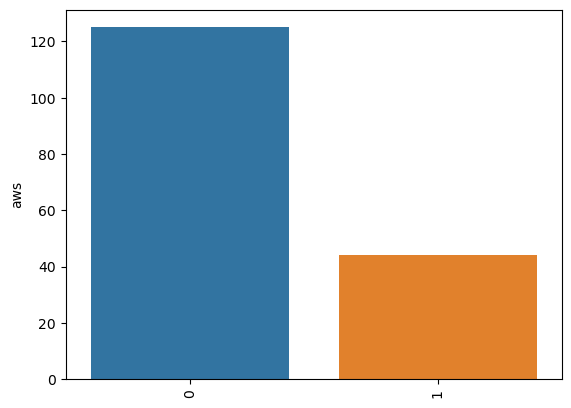

graph for excel: total = 2


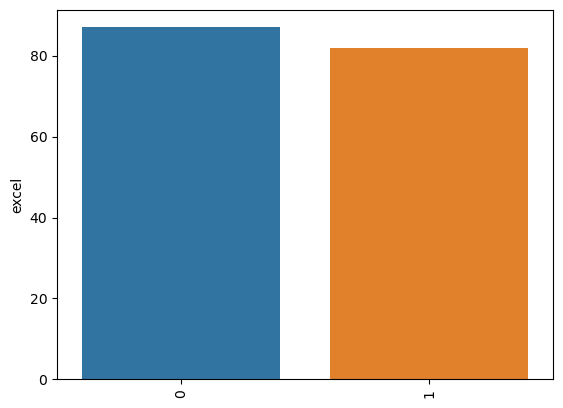

graph for seniority: total = 2


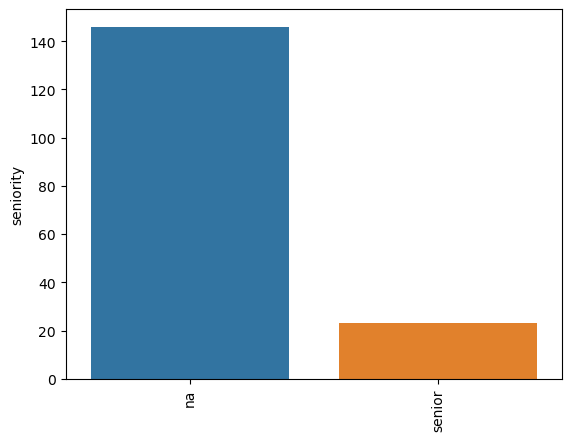

In [23]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [24]:
df['Type of ownership']

0      Nonprofit Organization
1            Company - Public
2           Company - Private
3            Company - Public
4           Company - Private
                ...          
164          Company - Public
165    Nonprofit Organization
166          Company - Public
167         Company - Private
168          Company - Public
Name: Type of ownership, Length: 169, dtype: object

graph for Location: total = 20


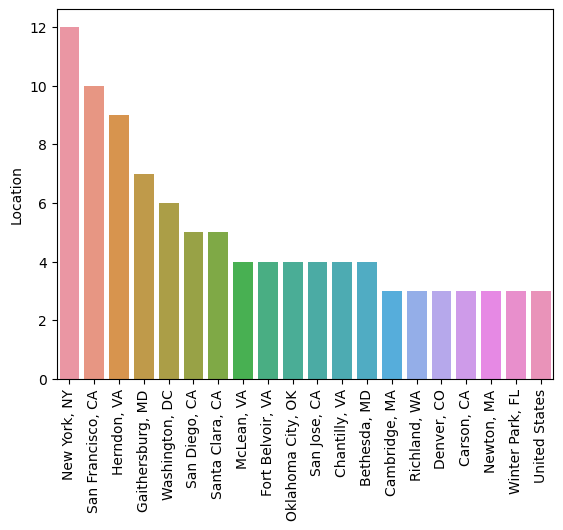

graph for Headquarters: total = 20


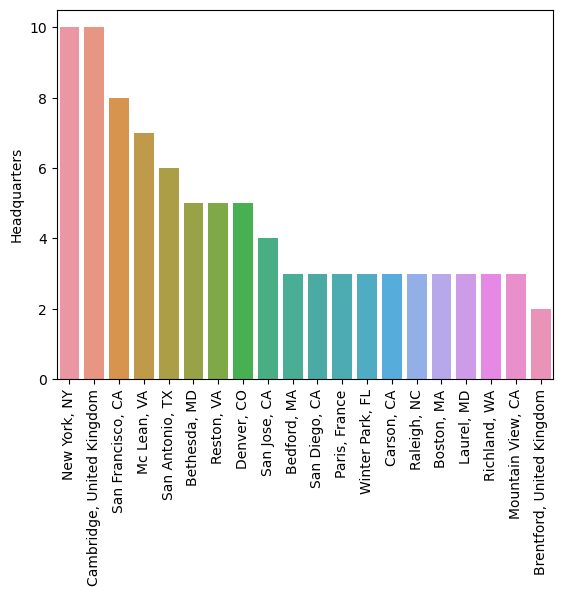

graph for company_text: total = 20


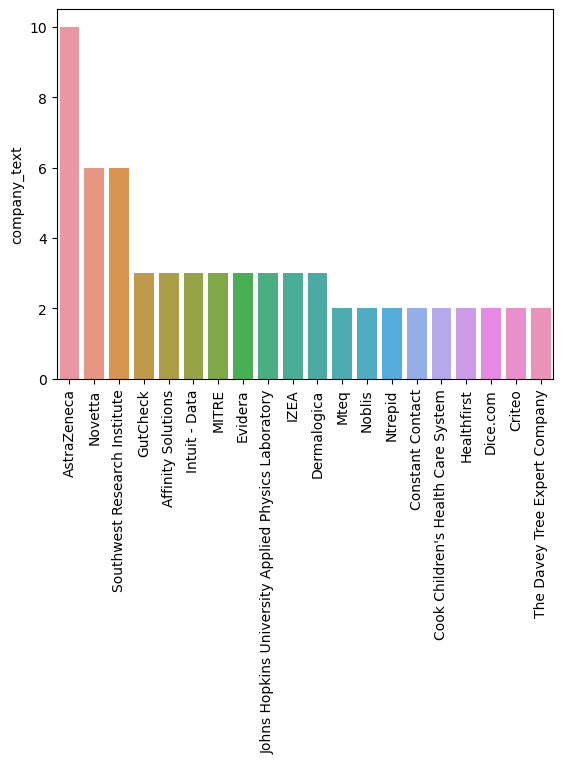

In [31]:
for i in df_cat[['Location', 'Headquarters', 'company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text',
       'num_elements', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [25]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,122.911765
data engineer,109.500000
data scientist,125.536697
manager,112.750000
mle,119.071429
na,122.068182


In [26]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na         122.900000
               senior     122.928571
data engineer  na         106.000000
               senior     148.000000
data scientist na         124.348958
               senior     134.307692
manager        na         105.000000
               senior     120.500000
mle            na         114.250000
               senior     148.000000
na             na         122.068182

In [27]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [31]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WV        data scientist           1
WI        data scientist           1
          analyst                  1
WA        data scientist           4
VA        na                       4
          mle                      2
          data scientist          15
          analyst                  4
TX        na                       1
          data scientist           2
          analyst                  3
PA        analyst                  1
          data scientist           1
OR        mle                      1
OK        na                       4
OH        na                       1
          data scientist           4
NY        data scientist           9
          data engineer            2
          analyst                  1
NJ        data scientist           1
NH        mle                      1
          data scientist           1
MS        na                       1
MO        data scientist           3
          data engineer            1
MI        data scientist           2
MD        na                       6
          data scientist           7
          data engineer            1
MA        na                       1
          manager                  1
          data scientist          12
KS        data scientist           1
IN        analyst                  2
          na                       1
          data scientist           1
IL        data scientist           4
          analyst                  1
GA        data scientist           3
FL        na                       1
          data engineer            3
DE        data scientist           1
DC        data scientist           6
CO        data scientist           3
CA        manager                  1
          data engineer            3
          data scientist          24
          analyst                  4
          mle                      3
          na                       2
AL        data engineer            1

In [28]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DE,271.500000
WI,183.000000
MI,173.000000
NH,161.000000
DC,141.583333
MO,138.166667
CA,131.604167
CO,129.333333
NY,127.888889


In [51]:
#salay by rating
#rating, Industry, revenue, num_comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership

In [29]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'desc_len', 'Type of ownership', 'avg_salary']]

In [30]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
3.9     143.250000
4.1     139.000000
3.6     135.700000
2.3     133.000000
4.5     130.538462
3.1     129.500000
2.9     128.500000
3.2     126.000000
3.0     123.500000
2.5     123.500000
3.3     123.083333
3.5     121.423077
4.2     119.590909
4.7     119.250000
3.8     119.156250
3.4     118.954545
4.4     118.300000
4.0     117.194444
4.8     115.500000
3.7     115.468750
4.3     113.800000
4.6     113.000000
4.9     105.000000
2.7     103.000000
Industry
                                         avg_salary
Industry                                           
Video Games                              183.000000
Transportation Equipment Manufacturing   183.000000
Research & Development                   160.333333
Electrical & Electronic Manufacturing    154.000000
Staffing & Outsourcing                   145.333333
Architectural & Engineering Services     140.750000
Federal Agencies                         136.100000
Express Delivery Servi

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [33]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
##error

In [40]:
import sys
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [42]:
!pip install wordcloud


In [48]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

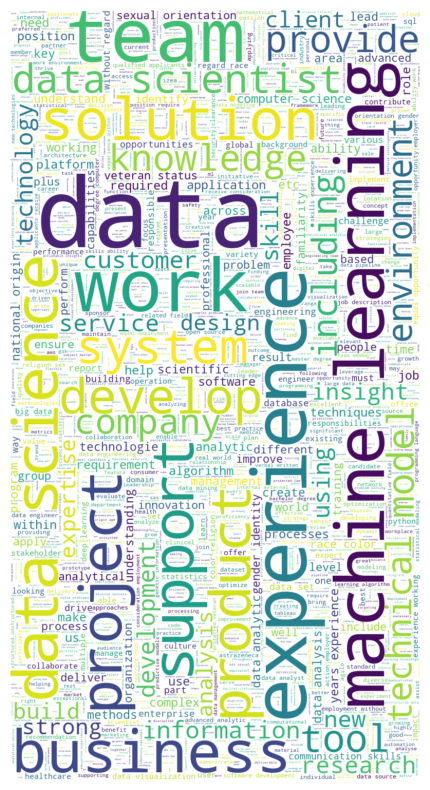

In [51]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

wc.to_file("wordcloud.png")  

In [53]:
df.to_csv('data_eda.csv', index = False)
pd.read_csv('data_eda.csv')


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,r_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,31,0,0,0,1,0,data scientist,senior,3389,3
1,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,24,1,0,0,1,1,data scientist,na,3349,3
2,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,26,1,0,0,0,1,data scientist,na,2728,3
3,8,Staff Data Scientist - Analytics,$137K-$171K (Glassdoor est.),Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,...,41,0,0,0,0,0,data scientist,na,456,3
4,10,Data Scientist,$137K-$171K (Glassdoor est.),Join our team dedicated to developing and exec...,4.5,Novetta\n4.5,"Herndon, VA","Mc Lean, VA",501 to 1000 employees,2012,...,12,1,0,0,1,1,data scientist,na,3607,3
5,11,Data Scientist,$137K-$171K (Glassdoor est.),About Us\n\n\nInterested in working for a huma...,4.7,1904labs\n4.7,"Saint Louis, MO","Saint Louis, MO",51 to 200 employees,2016,...,8,1,0,1,0,0,data scientist,na,5020,2
6,12,"Data Scientist - Statistics, Early Career",$137K-$171K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310918\n\n...,3.7,PNNL\n3.7,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,59,0,0,0,0,1,data scientist,na,5278,3
7,18,Data Analyst II,$137K-$171K (Glassdoor est.),The Data Analyst II is responsible for data en...,4.2,"Insight Enterprises, Inc.\n4.2","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,...,36,0,0,0,0,1,analyst,na,4218,3
8,21,Data Scientist/Machine Learning,$137K-$171K (Glassdoor est.),"PulsePoint™, a global programmatic advertising...",4.3,PulsePoint\n4.3,"New York, NY","New York, NY",51 to 200 employees,2011,...,13,1,0,1,0,0,data scientist,na,3741,3
9,23,Business Intelligence Analyst I- Data Insights,$137K-$171K (Glassdoor est.),Position Summary\n\nIndividuals within the\nBu...,3.5,Guardian Life\n3.5,"Appleton, WI","New York, NY",5001 to 10000 employees,1860,...,164,0,0,0,0,0,analyst,na,3733,1


SyntaxError: invalid syntax (394735198.py, line 1)